In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import torch
import matplotlib.pyplot as plt
from distutils.dir_util import copy_tree
from tqdm import tqdm

In [2]:
!git clone https://github.com/jannisborn/covid19_ultrasound.git

Cloning into 'covid19_ultrasound'...
remote: Enumerating objects: 4503, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 4503 (delta 21), reused 20 (delta 6), pack-reused 4453
Receiving objects: 100% (4503/4503), 165.47 MiB | 36.83 MiB/s, done.
Resolving deltas: 100% (353/353), done.
Updating files: 100% (3872/3872), done.


In [3]:
meta_data = pd.read_csv('./covid19_ultrasound/data/dataset_metadata.csv')

In [4]:
meta_data[meta_data['InThisRepo'] == 'Yes']

,Date added,Current location,Filename,URL (Video Name),Label,Lung Severity Score,License,LinkToLicense,ChangesMade,InThisRepo,...,Healthy,Fever,Cough,Respiratory problems,Headache,Loss of smell/taste,Fatigue,Sore throat,Asymptomatic,Other
21,20.04.20,data/pocus_videos/Convex,Cov-Atlas+(44),http://www.thepocusatlas.com/covid19-1/m2ra6cg...,COVID-19,2.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0.0,1,0,1,0,0,0,0,0,NaN
22,20.04.20,data/pocus_videos/Convex,Cov-Atlas+(45),http://www.thepocusatlas.com/covid19-1/3ytz1el...,COVID-19,3.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0.0,1,0,1,0,0,0,0,0,NaN
23,20.04.20,data/pocus_videos/Convex,Cov-Atlas-Day+2,http://www.thepocusatlas.com/covid19 (Day2),COVID-19,1.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
24,20.04.20,data/pocus_videos/Convex,Cov-Atlas-Day+4,http://www.thepocusatlas.com/covid19 (Day4),COVID-19,3.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
25,20.04.20,data/pocus_videos/Convex,Pneu-Atlas-pneumonia,http://www.thepocusatlas.com/ (Classic Finding...,Bacterial pneumonia,NaN,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,19.01.21,pocus_images/convex,Cov_Oliviera_2020_Fig15A,https://www.scielo.br/img/revistas/rb/v53n4//0...,COVID-19,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
365,19.01.21,pocus_images/linear,Cov_Oliviera_2020_Fig16,https://www.scielo.br/img/revistas/rb/v53n4//0...,COVID-19,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
371,19.01.21,pocus_videos/convex,Cov_emdocs_vid1,http://www.emdocs.net/wp-content/uploads/2020/...,COVID-19,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
372,19.01.21,pocus_videos/linear,Cov_emdocs_vid2,http://www.emdocs.net/wp-content/uploads/2020/...,COVID-19,3.0,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN


In [5]:
meta_data['Label'].unique()

array(['COVID-19', 'regular', 'Bacterial pneumonia', 'Viral pneumonia',
       'Regular'], dtype=object)

In [6]:
!zip -r 'extra_data.zip' '../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001'

  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/ (stored 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published / (stored 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/ (stored 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Small pleural effusion.mp4 (deflated 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Small pleural effusion(1).mp4 (deflated 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Ascites in left upper quadrant.mp4 (deflated 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Pleural effusion.mp4 (deflated 0%)
  adding: ../input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Normal Lung/ (stored 

In [7]:
!mv ./extra_data.zip ./covid19_ultrasound/data/

In [8]:
os.chdir('./covid19_ultrasound/data/')

In [9]:
!ls

README.md		  get_and_process_web_data.sh
crop.json		  parse_butterfly.sh
crop_processed_data.py	  pocus_images
data_from_butterfly.json  pocus_videos
dataset_metadata.csv	  process_butterfly_videos.py
extra_data.zip


In [10]:
!sh get_and_process_web_data.sh

youtube-dl could not be found, installing now..
--2022-10-13 17:39:13--  https://yt-dl.org/downloads/latest/youtube-dl
Resolving yt-dl.org (yt-dl.org)... 95.143.172.170, 2001:1a50:11:0:5f:8f:acaa:177
Connecting to yt-dl.org (yt-dl.org)|95.143.172.170|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://yt-dl.org/downloads/2021.12.17/youtube-dl [following]
--2022-10-13 17:39:14--  https://yt-dl.org/downloads/2021.12.17/youtube-dl
Reusing existing connection to yt-dl.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ytdl-org/youtube-dl/releases/download/2021.12.17/youtube-dl [following]
--2022-10-13 17:39:14--  https://github.com/ytdl-org/youtube-dl/releases/download/2021.12.17/youtube-dl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-product

In [11]:
!sh parse_butterfly.sh

Archive:  extra_data.zip
   creating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/
   creating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /
   creating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/
  inflating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Small pleural effusion.mp4  
  inflating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Small pleural effusion(1).mp4  
  inflating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Ascites in left upper quadrant.mp4  
  inflating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /Other/Pleural effusion.mp4  
   creating: butterfly/input/ultrasound-butterfly/butter_fly/Published -20210112T164653Z-001/Published /

In [12]:
os.chdir('/kaggle/working')

In [13]:
!ls

__notebook__.ipynb  covid19_ultrasound


In [14]:
base_dir = "./covid19_ultrasound/data/"
out_table = pd.DataFrame(index=['cov', 'pne', 'reg', 'vir'])
for modality in ["convex", "linear"]:
    for datatype in ["videos", "images"]:
        path = os.path.join(base_dir, "pocus_" + datatype, modality)
        file_list = filter(
            lambda x: (
                x[0] != "." and os.path.isfile(os.path.join(path, x)) and
                not "_Butterfly" in x
            ), os.listdir(path)
        )
        label_list = [f[:3].lower() for f in file_list]
        counts = [
            label_list.count(lab) for lab in ['cov', 'pne', 'reg', 'vir']
        ]
        out_table[modality + "_" + datatype] = counts
print("Data without Butterfly:")
print(out_table)

Data without Butterfly:
     convex_videos  convex_images  linear_videos  linear_images
cov             41             19              7              4
pne             49             18              1              2
reg             64             12              8              0
vir              3              0              3              0


In [15]:
meta_data['Current location'].unique()

array(['butterfly', 'not used', 'data/pocus_videos/Convex',
       'not used - same as Pneu-Atlas-pneumonia2.gif',
       'data/pocus_videos/Linear', 'pocus_images/Convex', 'not_to_use',
       'Not used', 'data/pocus_images/convex', 'data/pocus_videos/convex',
       'data/data_with_artifacts', 'pocus_videos/convex',
       'pocus_images/convex', 'data_with_artifacts',
       'not_to_use (Nina local)', 'pocus_images/Linear',
       'pocus_videos/Convex', 'pocus_videos/Linear',
       'pocus_videos/linear/label_uncertain', 'pocus_images/linear',
       'pocus_videos/linear'], dtype=object)

In [16]:
def label_enc(idx):
    if idx == 'COVID-19':
        return 2
    elif idx == 'Bacterial pneumonia':
        return 1
    elif idx == 'Viral pneumonia':
        return 1
    else:
        return 0
meta_data['Label'] = meta_data['Label'].apply(label_enc)

In [17]:
meta_data['InThisRepo']

0       No
1       No
2       No
3       No
4       No
      ... 
369     No
370     No
371    Yes
372    Yes
373    Yes
Name: InThisRepo, Length: 374, dtype: object

In [18]:
meta_data

,Date added,Current location,Filename,URL (Video Name),Label,Lung Severity Score,License,LinkToLicense,ChangesMade,InThisRepo,...,Healthy,Fever,Cough,Respiratory problems,Headache,Loss of smell/taste,Fatigue,Sore throat,Asymptomatic,Other
0,20.04.20,butterfly,Cov-Butterfly-COVID Lung 2,https://www.butterflynetwork.com/covid-19#lung...,2,NaN,None,N.A.,"Cropping, Artifact removal, frame subselection",No,...,0.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
1,20.04.20,butterfly,Cov-Butterfly-Skip Lesion,https://www.butterflynetwork.com/covid19/covid...,2,NaN,None,N.A.,"Cropping, Artifact removal, frame subselection",No,...,0.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
2,20.04.20,butterfly,Cov-Butterfly-Confluent B lines,https://www.butterflynetwork.com/covid19/covid...,2,2.0,None,N.A.,"Cropping, Artifact removal, frame subselection",No,...,0.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
3,20.04.20,butterfly,Reg-Butterfly-Normal Lung A lines,https://www.butterflynetwork.com/covid19/covid...,0,NaN,None,N.A.,"Cropping, Artifact removal, frame subselection",No,...,1.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
4,20.04.20,butterfly,Reg-Butterfly-Normal Lung_Example 2,https://www.butterflynetwork.com/covid19/covid...,0,0.0,None,N.A.,"Cropping, Artifact removal, frame subselection",No,...,1.0,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,19.01.21,pocus_videos/convex,Cov_wfumb_case_dez,https://www.youtube.com/watch?v=CpXPimphNSM&fe...,2,NaN,None,N.A.,Cropping,No,...,NaN,0,0,0,0,0,0,0,1,NaN
370,19.01.21,pocus_videos/convex,Cov_Arnthfield_2020_Vid3,https://www.medrxiv.org/content/10.1101/2020.1...,2,NaN,CC-BY-NC-ND,https://creativecommons.org/licenses/by-nc-nd/...,Cropping,No,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
371,19.01.21,pocus_videos/convex,Cov_emdocs_vid1,http://www.emdocs.net/wp-content/uploads/2020/...,2,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN
372,19.01.21,pocus_videos/linear,Cov_emdocs_vid2,http://www.emdocs.net/wp-content/uploads/2020/...,2,3.0,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,NaN,n/A,n/A,n/A,n/A,n/A,n/A,n/A,n/A,NaN


In [19]:
possible_endings = [
       ".mp4", ".mpeg", ".avi", ".gif",
    ".mov"
]
base = './covid19_ultrasound/data/'
table = meta_data
#table = table[table['InThisRepo'] == 'Yes']
real_paths = []
labels = []
in_this_repos = []
for i in range(len(table)):
    fn = table.iloc[i]["Filename"]
    location = table.iloc[i]["Current location"].lower()
    if pd.isnull(location) or 'data_with_artifacts' in location:
        continue
    if location.startswith("data/"):
        location = location[5:]

    path1 = os.path.join(base, location, fn)
    path2 = ".".join(path1.split(".")[:-1]) + ".mp4"
    for ending in possible_endings:
        if os.path.exists(path1 + ending):
            table = table.copy()
            real_path = path1+ending
            label = table['Label'].iloc[i]
            in_this_repo = table['InThisRepo'].iloc[i]
            
            real_paths.append(real_path)
            labels.append(label)
            in_this_repos.append(in_this_repo)

preprocessed_metadata = pd.DataFrame({'path':real_paths,'label':labels,'in_this_repo':in_this_repos})

In [20]:
vid_path = preprocessed_metadata['path'].iloc[0]

In [21]:
vidcap = cv2.VideoCapture(vid_path)
success,image = vidcap.read()

In [22]:
preprocessed_metadata

,path,label,in_this_repo
0,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
1,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
2,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
3,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
4,./covid19_ultrasound/data/pocus_videos/convex/...,1,Yes
...,...,...,...
169,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
170,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
171,./covid19_ultrasound/data/pocus_videos/convex/...,2,Yes
172,./covid19_ultrasound/data/pocus_videos/linear/...,2,Yes


In [23]:
!mkdir data

In [24]:
paths = []
labels = []
video_ids = []
for i in tqdm(range(len(preprocessed_metadata))):
    vidcap = cv2.VideoCapture(preprocessed_metadata['path'].iloc[i])
    success,image = vidcap.read()
    count = 0
    while success:
        path = f"./data/Video_{i}_frame_%d.jpg" % count
        video_id = f'Video_{i}'
        cv2.imwrite(path, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        #print('Read a new frame: ', success)
        count += 1
        paths.append(path)
        video_ids.append(video_id)
        labels.append(preprocessed_metadata['label'].iloc[i])
        
metadata_final = pd.DataFrame({'path':paths,'label':labels,'video_id':video_ids})

100%|██████████| 174/174 [02:03<00:00,  1.41it/s]


In [25]:
metadata_final

,path,label,video_id
0,./data/Video_0_frame_0.jpg,2,Video_0
1,./data/Video_0_frame_1.jpg,2,Video_0
2,./data/Video_0_frame_2.jpg,2,Video_0
3,./data/Video_0_frame_3.jpg,2,Video_0
4,./data/Video_0_frame_4.jpg,2,Video_0
...,...,...,...
26890,./data/Video_173_frame_70.jpg,2,Video_173
26891,./data/Video_173_frame_71.jpg,2,Video_173
26892,./data/Video_173_frame_72.jpg,2,Video_173
26893,./data/Video_173_frame_73.jpg,2,Video_173


In [26]:
#metadata_final.to_csv('covid_data.csv',index=False)

<AxesSubplot:>

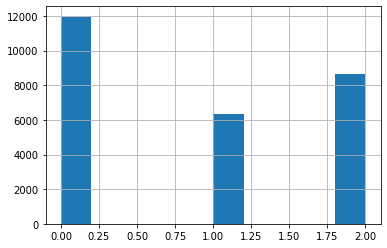

In [27]:
metadata_final.label.hist()

In [28]:
meta_data['Current location'].unique()

array(['butterfly', 'not used', 'data/pocus_videos/Convex',
       'not used - same as Pneu-Atlas-pneumonia2.gif',
       'data/pocus_videos/Linear', 'pocus_images/Convex', 'not_to_use',
       'Not used', 'data/pocus_images/convex', 'data/pocus_videos/convex',
       'data/data_with_artifacts', 'pocus_videos/convex',
       'pocus_images/convex', 'data_with_artifacts',
       'not_to_use (Nina local)', 'pocus_images/Linear',
       'pocus_videos/Convex', 'pocus_videos/Linear',
       'pocus_videos/linear/label_uncertain', 'pocus_images/linear',
       'pocus_videos/linear'], dtype=object)

In [29]:
possible_endings = [
       ".jpg", ".png", ".JPG"
]
base = './covid19_ultrasound/data/'
table = meta_data
#table = table[table['InThisRepo'] == 'Yes']
real_paths = []
labels = []
in_this_repos = []
for i in range(len(table)):
    fn = table.iloc[i]["Filename"]
    location = table.iloc[i]["Current location"].lower()
    if pd.isnull(location) or 'data_with_artifacts' in location:
        continue
    if location.startswith("data/"):
        location = location[5:]

    path1 = os.path.join(base, location, fn)
    path2 = ".".join(path1.split(".")[:-1]) + ".mp4"
    for ending in possible_endings:
        if os.path.exists(path1 + ending):
            table = table.copy()
            real_path = path1+ending
            label = table['Label'].iloc[i]
            in_this_repo = table['InThisRepo'].iloc[i]
            
            real_paths.append(real_path)
            labels.append(label)
            in_this_repos.append(in_this_repo)

preprocessed_metadata = pd.DataFrame({'path':real_paths,'label':labels,'in_this_repo':in_this_repos})

In [30]:
preprocessed_metadata

,path,label,in_this_repo
0,./covid19_ultrasound/data/pocus_images/convex/...,1,No
1,./covid19_ultrasound/data/pocus_images/convex/...,1,No
2,./covid19_ultrasound/data/pocus_images/convex/...,1,Yes
3,./covid19_ultrasound/data/pocus_images/convex/...,0,Yes
4,./covid19_ultrasound/data/pocus_images/convex/...,1,Yes
5,./covid19_ultrasound/data/pocus_images/convex/...,0,Yes
6,./covid19_ultrasound/data/pocus_images/convex/...,1,Yes
7,./covid19_ultrasound/data/pocus_images/convex/...,1,Yes
8,./covid19_ultrasound/data/pocus_images/convex/...,1,Yes
9,./covid19_ultrasound/data/pocus_images/convex/...,1,Yes


In [31]:
paths = []
labels = []
video_ids = []
for i in tqdm(range(len(preprocessed_metadata))):
    path = f"./data/Image_{i}_frame_0.jpg"
    cv2.imwrite(path,plt.imread(preprocessed_metadata['path'].iloc[i]))
    paths.append(path)
    labels.append(preprocessed_metadata['label'].iloc[i])
    video_ids.append(f'Image_{i}')

metadata_final_2 = pd.DataFrame({'path':paths,'label':labels,'video_id':video_ids})

100%|██████████| 54/54 [00:01<00:00, 48.85it/s]


In [32]:
metadata_final_2

,path,label,video_id
0,./data/Image_0_frame_0.jpg,1,Image_0
1,./data/Image_1_frame_0.jpg,1,Image_1
2,./data/Image_2_frame_0.jpg,1,Image_2
3,./data/Image_3_frame_0.jpg,0,Image_3
4,./data/Image_4_frame_0.jpg,1,Image_4
5,./data/Image_5_frame_0.jpg,0,Image_5
6,./data/Image_6_frame_0.jpg,1,Image_6
7,./data/Image_7_frame_0.jpg,1,Image_7
8,./data/Image_8_frame_0.jpg,1,Image_8
9,./data/Image_9_frame_0.jpg,1,Image_9


In [33]:
metadata_final

,path,label,video_id
0,./data/Video_0_frame_0.jpg,2,Video_0
1,./data/Video_0_frame_1.jpg,2,Video_0
2,./data/Video_0_frame_2.jpg,2,Video_0
3,./data/Video_0_frame_3.jpg,2,Video_0
4,./data/Video_0_frame_4.jpg,2,Video_0
...,...,...,...
26890,./data/Video_173_frame_70.jpg,2,Video_173
26891,./data/Video_173_frame_71.jpg,2,Video_173
26892,./data/Video_173_frame_72.jpg,2,Video_173
26893,./data/Video_173_frame_73.jpg,2,Video_173


In [34]:
meta_data = pd.concat([metadata_final,metadata_final_2],ignore_index=True)

In [35]:
meta_data.to_csv('covid_data.csv',index=False)

In [36]:
#metadata_final.to_csv('covid_data.csv',index=False)

In [37]:
#metadata_final['video_id'].unique()